<a href="https://colab.research.google.com/github/Kaitlynn218/Dark-Energy/blob/main/supernovae_cosmology_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [18]:
# In-Class Demo --> Age of the Universe
Mpc = 3 * 10**19 * u.km
H = 70 * u.km / u.s / Mpc
t0 = 1 / H
print(t0.to(u.Gyr))

13.580609063155265 Gyr


In [19]:
# In-Class Demo --> Practice with numpy.polyfit

In [20]:
import numpy as np
import numpy.polynomial as poly

In [22]:
import warnings
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
z

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [23]:
p = np.poly1d(z)
p(0.5)

0.614384920634922

In [24]:
p(3.5)

-0.3473214285714268

In [25]:
p(10)

22.579365079364877

In [26]:
from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003 (1).vot


In [27]:
dat = astropy.io.ascii.read("Tonry_2003.vot")

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


Text(0, 0.5, 'Velocity [km/s]')

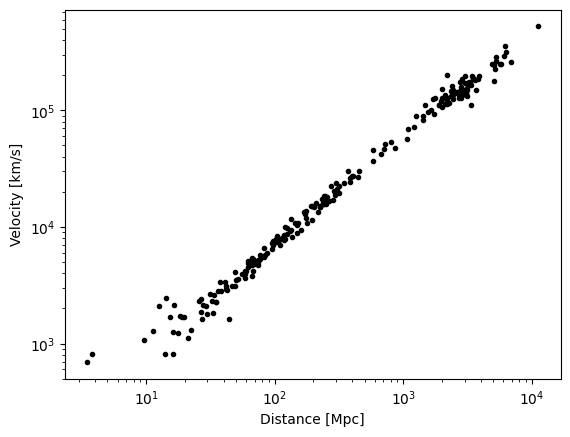

In [28]:
distance = 10**dat["col8"] / 72.0 * u.mpc # 72.0 is Hubble's constant
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc # measuring distance comes with a larger error and is more difficult to measure than velocity
velocity = 10**dat["col7"] * u.km / u.s
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none") # plotting the values
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
# purpose is to fit a line and determine the slope/ hubble's constant

Text(0, 0.5, 'Velocity [km/s]')

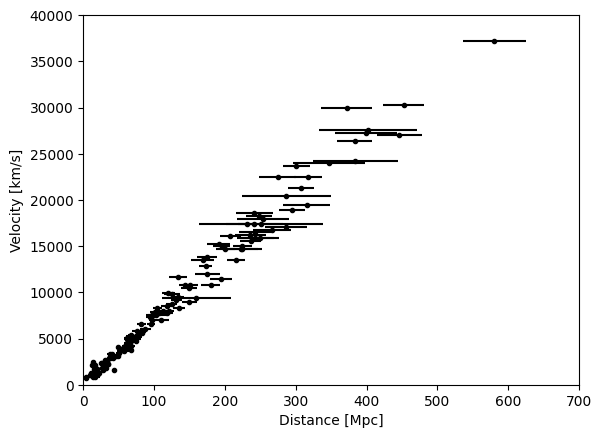

In [29]:
# every point has a value and therefore an error, which is plotted below
# local universe data --> our time
distance = 10**dat["col8"] / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none") # visualizing the error for distance
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
# the universe we're plotting here is smaller than the one above. By splitting the data in 2 (local universe and distant universe) and finding the slope of both, we'll be able to determine hubble's constant
# we find that the local universe has a bigger slope and therefore accelerates faster than the distant universe.

In [30]:
x = distance.to(u.mpc).value  # define x-values
ind = np.where((x > 0) & (x < 700)) # an index of an x array to get values of x between 0 and 700 and the corresponding y-values
z = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1) # helps us plot a linear line by inputting x and y-values as well as the degree we want to fit, which in this case is x^1 since we want a linear line

In [31]:
p = np.poly1d(z) # generates a function

In [32]:
velocity_model = p(distance.to(u.mpc).value) # evaluate the linear function at the x-value of distance and results

Text(50, 30000, '$H_0$= 67.48 km/s/Mpc')

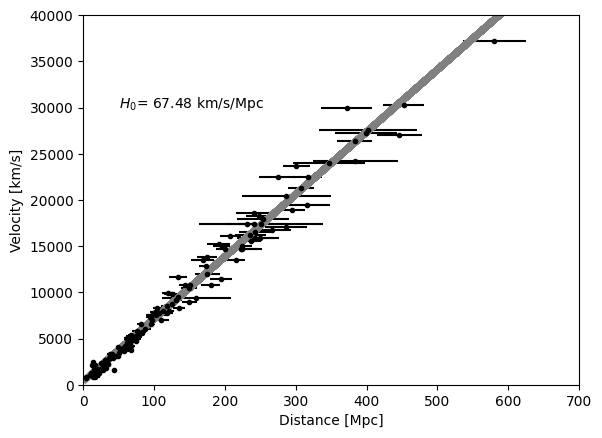

In [33]:
# plots a straight line that goes through the data points
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.plot(distance.to(u.mpc).value, velocity_model, color="grey", linewidth=5)
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.annotate(r"$H_0$= {0:5.2f} km/s/Mpc".format(z[0]), xy=(50, 30000)) # gives us the hubble constant for the local

Text(0, 0.5, 'Velocity [km/s]')

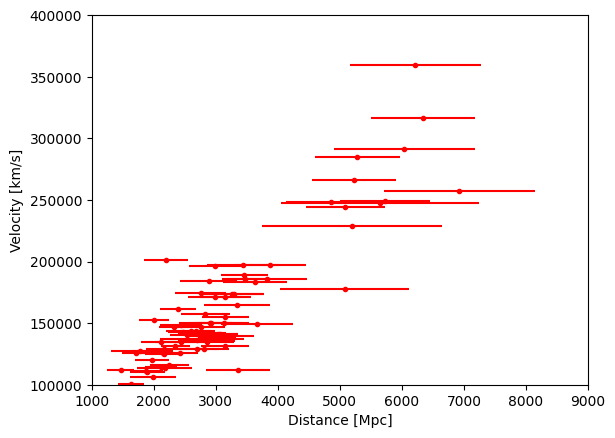

In [40]:
# every point has a value and therefore an error, which is plotted below
# distant universe data
distance = 10**dat["col8"] / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s
yerr = distance_error.to(u.mpc).value[ind]

plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="r", linestyle="none") # visualizing the error for distance
plt.xlim(1000, 9000)
plt.ylim(1e5, 4e5)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

In [41]:
x = distance.to(u.mpc).value  # define x-values
ind = np.where((x > 1000) & (x < 9000)) # an index of an x array to get values of x between 0 and 700 and the corresponding y-values
z = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1) # helps us plot a linear line

In [42]:
p = np.poly1d(z) # generates a function

In [43]:
velocity_model = p(distance.to(u.mpc).value) # evaluate the linear function at the x-value of distance and results in

Text(2000, 250000, ' = 39.71 km/s/Mpc')

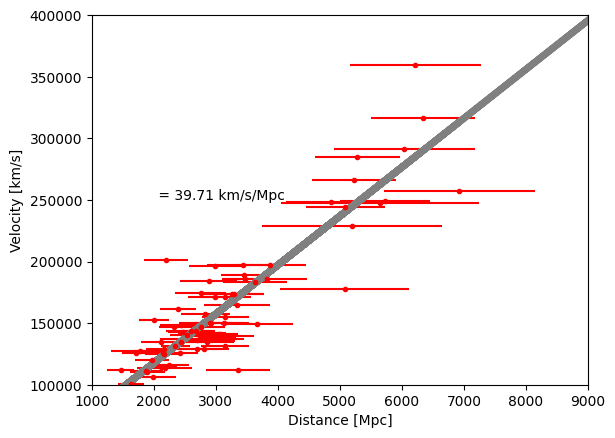

In [46]:
# plots a straight line that goes through the data points
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="r", linestyle="none")
plt.plot(distance.to(u.mpc).value, velocity_model, color="grey", linewidth=5)
plt.xlim(1000, 9000)
plt.ylim(1e5, 4e5)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.annotate(r" = {0:5.2f} km/s/Mpc".format(z[0]), xy=(2000, 250000)) # gives us the hubble constant for the distant universe